# Data Analysis on Wine Quality 

Part of the pandas instruction during _neuefische_ Data Sciene Bootcamp.

## Task

Now that you've worked on all the basics with one data set, it's time to do it with a second! This time, though, you'll go through the process of downloading the data set yourself. You'll also go through the process of learning to ask questions of the data (i.e. you won't be given any questions). We'll point you to a number of different data sets, and let you go at it. In reality, this is often how data science works. There isn't a clear-cut set of instructions on what to do - you kind of just dive into the data and see what you find!

Your goal by the end of Part 5 is to be able to tell a story with your data. Whether that means you query it and find something interesting, examine a number of different columns and their values, or plot a couple of different columns, it doesn't matter. You should aim to find at least one piece of interesting information in your data (and ideally even more than one). Then, tell your peers and the instructors what you've found!


Potential data sources: 

1. [Forest-fires](http://archive.ics.uci.edu/ml/datasets/Forest+Fires)
2. [Iris](http://archive.ics.uci.edu/ml/datasets/Iris)
3. [Another wine data set](http://archive.ics.uci.edu/ml/datasets/Wine)
4. [Abalone](http://archive.ics.uci.edu/ml/datasets/Abalone)
5. [Adult Income data set](http://archive.ics.uci.edu/ml/datasets/Adult)

The links above are all to the home pages of these data sources. At the top of these pages, you will find a link the the `Data Folder` where you can actually find the data. The majority of these data sets don't come in `.csv` format. While one of the datasets is available in `.csv` format, we encourage you to pick whatever data set you find most interesting (regardless of the format), and challenge yourself to read the necessary documentation and go through the process of figuring out how to get the data from the web and into a `DataFrame` (the instructors will also be around to help).

## My approach
1. First of all I decided to pick the wine topic, just because... I like to drink wine!
2. After a short skim of the data set I phrased my research guestion: 

    **"Is there a relation between alcohol, hue and color intensity?**
    

3. I loaded the data into the notebook in order to create a dataframe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
col_names = [
        "cultivars",
        "Alcohol", 
        "Malic acid", 
        "Ash", 
        "Alcalinity of ash", 
        "Magnesium", 
        "Total phenols", 
        "Flavanoids", 
        "Nonflavanoid phenols", 
        "Proanthocyanins", 
        "Color intensity", 
        "Hue", 
        "OD280/OD315 of diluted wines", 
        "Proline"
        ]

#tried read_csv for import of "wine.data" as file is essentially csv
df = pd.read_csv("wine.data", delimiter=",", names=col_names) 

#get rid of the whitespaces. Made the process a bit mor complicated, just for training purpose!
df.columns = [col.replace(" ", "_") for col in df.columns]




4. First contentwise exploration of the data

In [4]:
# get preview ot the data
df.info()
# > we have only continuous data values and no "entry" values detected


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
cultivars                       178 non-null int64
Alcohol                         178 non-null float64
Malic_acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity_of_ash               178 non-null float64
Magnesium                       178 non-null int64
Total_phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid_phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color_intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315_of_diluted_wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [5]:
# look into main statistical operations
df.describe()

# > Based on my practical knowledge, the alcohol values seem to be in alc percent

# > # src= https://www.analiticaweb.com.br/newsletter/09/51852_UV_WineColor.pdf 

# wine is using a summation of absorbance measurements
# in the violet, green and red areas of the visible spectrum.
# Wine color intensity = A420 + A520 + A620 (where Aλ
# represents the absorbance at wavelength λ).

#>
# • Wine Hue – a simplistic measure of the appearance of
# the color – a ratio of the absorbance in the violet to the
# absorbance in the green. Wine color hue = A420/ A520.B


,cultivars,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


5. To increase my focus on the relevant colums, I first performed a query on the relevant columns

In [6]:
df2=df.loc[: ,["cultivars", "Alcohol", "Color_intensity", "Hue"]]
df2.head()

,cultivars,Alcohol,Color_intensity,Hue
0,1,14.23,5.64,1.04
1,1,13.20,4.38,1.05
2,1,13.16,5.68,1.03
3,1,14.37,7.80,0.86
4,1,13.24,4.32,1.04


6. Which of the cultivars produced the most alcohol wine?

<AxesSubplot:title={'center':'Alcohol In Wine'}, ylabel='cultivars'>

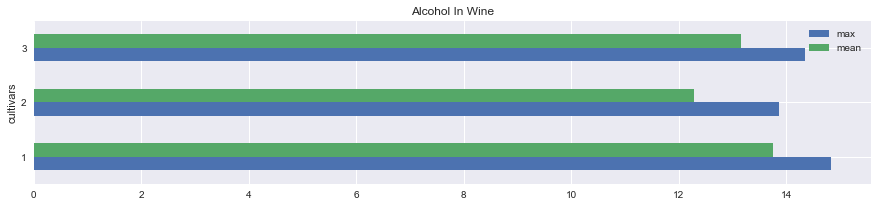

In [7]:
data = df2.groupby("cultivars").agg(["max", "mean"])["Alcohol"]
data
data.plot(kind="barh",title="Alcohol In Wine",figsize=(15,3))

# cultivare 2 produces wine with significant less alcohol in mean and average compared to cultivare 1!

7. Check relation between Alcohol, Color Intensity and Hue

<AxesSubplot:xlabel='Alcohol', ylabel='Color_intensity'>

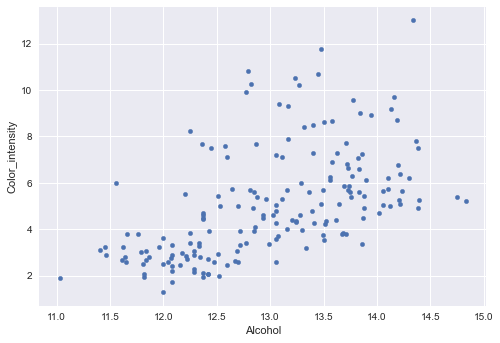

In [8]:
df2.plot(kind="scatter", x="Alcohol", y="Color_intensity")
# There is a very slight correlation between alcoholic strenght and color intensity

<AxesSubplot:xlabel='Alcohol', ylabel='Hue'>

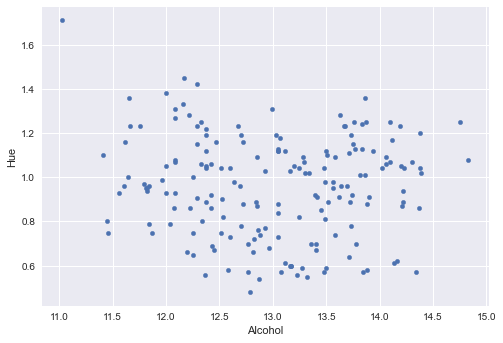

In [9]:
df2.plot(kind="scatter", x="Alcohol", y="Hue")
# No correlation between alcohol and hue found.1

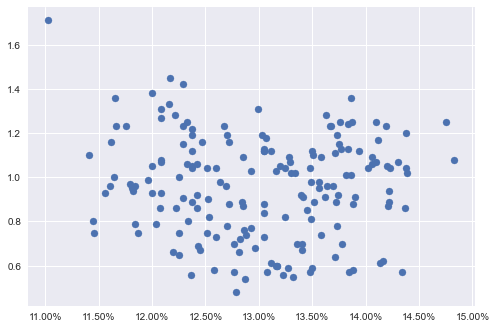

In [34]:
import matplotlib.ticker as ticker
# No correlation between alcohol and hue found.1
plt.scatter(df2["Alcohol"], df2["Hue"])
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter())

#plt.xlabel()